In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
x = data.drop(columns='Class', axis=1)
y = data['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score, precision_score ,average_precision_score, plot_precision_recall_curve, f1_score

실험 시나리오 1 - xgboost

In [6]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=32)
model.fit(train_x, train_y)

XGBClassifier(learning_rate=0.2, max_depth=4, random_state=32)

In [7]:
pred = model.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.80      0.88       123

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [8]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.9024108866843111
Precision:  0.9611650485436893
Recall:  0.8048780487804879
Precision-Recall:  0.7739577180112974
F1-score:  0.8761061946902655


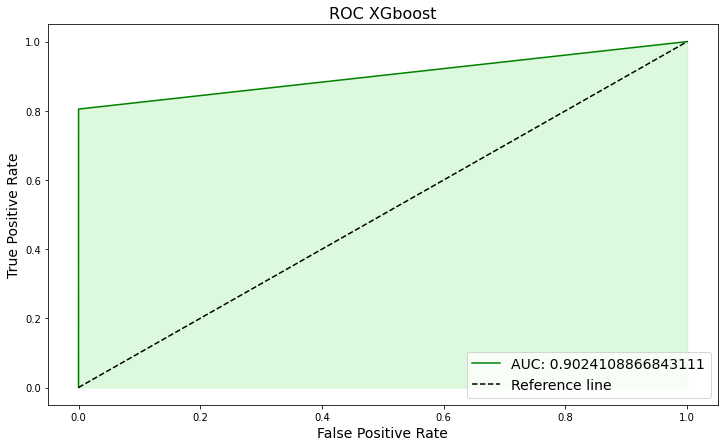

In [9]:
roc_auc_xgboost = np.mean(auc)
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(test_y, pred)

# plot 
plt.figure(figsize=(12,7))
plt.plot(fpr_xgboost, tpr_xgboost, color='green', label='AUC: {}'.format(roc_auc_xgboost))
plt.fill_between(fpr_xgboost, tpr_xgboost, color='lightgreen', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC XGboost', fontsize=16)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

0.8524349481409097

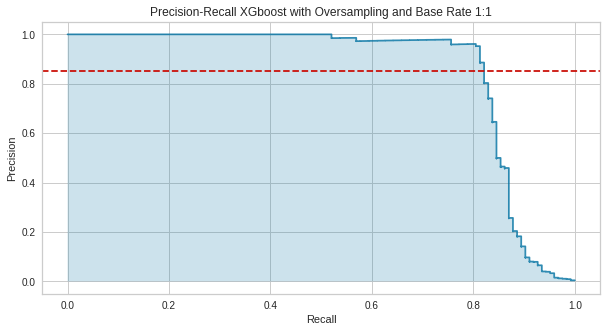

In [10]:
from yellowbrick.classifier import PrecisionRecallCurve, ConfusionMatrix
# Precision-Recall 
# yellowbrick 이용
plt.figure(figsize=(10,5))
plt.title('Precision-Recall XGboost with Oversampling and Base Rate 1:1')
plt.xlabel('Recall')
plt.ylabel('Precision')
prcur = PrecisionRecallCurve(model)
prcur.fit(train_x, train_y)
prcur.score(test_x, test_y)

실험 시나리오 2 - 다른 모델들과 비교 (Logistic Regression, KNN, RandomForest, MLP)

1. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(random_state=32)
lr.fit(train_x, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

In [13]:
pred = lr.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.70      0.71       123

    accuracy                           1.00     71202
   macro avg       0.86      0.85      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [14]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8493543254345303
Precision:  0.7166666666666667
Recall:  0.6991869918699187
Precision-Recall:  0.5016036591645937
F1-score:  0.7078189300411523


2. KNN (n_neighbors = 3) - 보류

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [17]:
pred = knn.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.06      0.11       123

    accuracy                           1.00     71202
   macro avg       0.94      0.53      0.55     71202
weighted avg       1.00      1.00      1.00     71202



In [18]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.5284482501263623
Precision:  0.875
Recall:  0.056910569105691054
Precision-Recall:  0.05142591568748754
F1-score:  0.10687022900763359


3. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=32)
rfc.fit(train_x, train_y)

RandomForestClassifier(random_state=32)

In [20]:
pred = rfc.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.76      0.85       123

    accuracy                           1.00     71202
   macro avg       0.98      0.88      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [21]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8820927178587616
Precision:  0.9690721649484536
Recall:  0.7642276422764228
Precision-Recall:  0.7409990277442674
F1-score:  0.8545454545454546


4. MLP

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)

MLPClassifier()

In [24]:
pred = mlp.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.10      0.18       123

    accuracy                           1.00     71202
   macro avg       0.93      0.55      0.59     71202
weighted avg       1.00      1.00      1.00     71202



In [25]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.5487664189519117
Precision:  0.8571428571428571
Recall:  0.0975609756097561
Precision-Recall:  0.08518263835324674
F1-score:  0.17518248175182483


* oversampling 적용한 xgboost

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
train_x_over, train_y_over = smote.fit_resample(train_x, train_y)
print('Distribution of training set after applying SMOTE :\n',pd.Series(train_y_over).value_counts() )

Distribution of training set after applying SMOTE :
 0    213236
1    213236
Name: Class, dtype: int64


In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x_over, train_y_over)

XGBClassifier()

In [28]:
pred = xgb.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.22      0.88      0.35       123

    accuracy                           0.99     71202
   macro avg       0.61      0.94      0.67     71202
weighted avg       1.00      0.99      1.00     71202



In [29]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.9363231704743503
Precision:  0.21951219512195122
Recall:  0.8780487804878049
Precision-Recall:  0.19295308346868653
F1-score:  0.35121951219512193


실험 시나리오 3 - test set의 base rate를 변경하여 실험

In [30]:
# test dataset Class 0, 1 나누기
test_x['Class'] = test_y

index2 = test_x.index[test_x.Class == 0]
test_1 = test_x.drop(index2, axis=0)
index1 = test_x.index[test_x.Class == 1]
test_0 = test_x.drop(index1, axis=0)

print(test_0.shape)
print(test_1.shape)

(71079, 31)
(123, 31)


In [31]:
# base rate 1:1인 test set
test_0_br_1 = test_0.sample(n=len(test_1))
test_br1 = pd.concat([test_0_br_1, test_1])
test_br1 = test_br1.sample(frac=1)
X_test_br1 = test_br1.drop('Class', axis=1)
y_test_br1 = test_br1['Class']

# base rate 1:10인 test set
test_0_br_10 = test_0.sample(n=len(test_1)*10)
test_br10 = pd.concat([test_0_br_10, test_1])
test_br10 = test_br10.sample(frac=1)
X_test_br10 = test_br10.drop('Class', axis=1)
y_test_br10 = test_br10['Class']

# base rate 1:100인 test set
test_0_br_100 = test_0.sample(n=len(test_1)*100)
test_br100 = pd.concat([test_0_br_100, test_1])
test_br100 = test_br100.sample(frac=1)
X_test_br100 = test_br100.drop('Class', axis=1)
y_test_br100 = test_br100['Class']

# base rate 1:577.87인 test set (원본)
X_test_brreal = test_x.drop('Class', axis=1)
y_test_brreal = test_x['Class']

In [32]:
print(X_test_br1.shape, y_test_br1.shape)
print(X_test_br10.shape, y_test_br10.shape)
print(X_test_br100.shape, y_test_br100.shape)
print(X_test_brreal.shape, y_test_brreal.shape)

(246, 30) (246,)
(1353, 30) (1353,)
(12423, 30) (12423,)
(71202, 30) (71202,)


1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=32)
lr.fit(train_x, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

In [34]:
# base rate = 1:1
pred = lr.predict(X_test_br1)
print (classification_report(y_test_br1, pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       123
           1       0.99      0.70      0.82       123

    accuracy                           0.85       246
   macro avg       0.88      0.85      0.84       246
weighted avg       0.88      0.85      0.84       246



In [35]:
precision_recall= average_precision_score(y_test_br1, pred)
precision = precision_score(y_test_br1, pred)
recall = recall_score(y_test_br1, pred)
auc  = roc_auc_score(y_test_br1, pred)
f1 = f1_score(y_test_br1, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8455284552845528
Precision:  0.9885057471264368
Recall:  0.6991869918699187
Precision-Recall:  0.8415568638445006
F1-score:  0.8190476190476191


In [36]:
# base rate = 1:10
pred = lr.predict(X_test_br10)
print (classification_report(y_test_br10, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1230
           1       0.99      0.70      0.82       123

    accuracy                           0.97      1353
   macro avg       0.98      0.85      0.90      1353
weighted avg       0.97      0.97      0.97      1353



In [37]:
precision_recall= average_precision_score(y_test_br10, pred)
precision = precision_score(y_test_br10, pred)
recall = recall_score(y_test_br10, pred)
auc  = roc_auc_score(y_test_br10, pred)
f1 = f1_score(y_test_br10, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8491869918699188
Precision:  0.9885057471264368
Recall:  0.6991869918699187
Precision-Recall:  0.7184969968821946
F1-score:  0.8190476190476191


In [38]:
# base rate = 1:100
pred = lr.predict(X_test_br100)
print (classification_report(y_test_br100, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12300
           1       0.95      0.70      0.80       123

    accuracy                           1.00     12423
   macro avg       0.97      0.85      0.90     12423
weighted avg       1.00      1.00      1.00     12423



In [39]:
precision_recall= average_precision_score(y_test_br100, pred)
precision = precision_score(y_test_br100, pred)
recall = recall_score(y_test_br100, pred)
auc  = roc_auc_score(y_test_br100, pred)
f1 = f1_score(y_test_br100, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.849390243902439
Precision:  0.945054945054945
Recall:  0.6991869918699187
Precision-Recall:  0.6637484707999076
F1-score:  0.8037383177570093


In [40]:
# base rate = 1:577.87
pred = lr.predict(X_test_brreal)
print (classification_report(y_test_brreal, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.70      0.71       123

    accuracy                           1.00     71202
   macro avg       0.86      0.85      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [41]:
precision_recall= average_precision_score(y_test_brreal, pred)
precision = precision_score(y_test_brreal, pred)
recall = recall_score(y_test_brreal, pred)
auc  = roc_auc_score(y_test_brreal, pred)
f1 = f1_score(y_test_brreal, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8493543254345303
Precision:  0.7166666666666667
Recall:  0.6991869918699187
Precision-Recall:  0.5016036591645937
F1-score:  0.7078189300411523


2. MLP

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(train_x, train_y)

MLPClassifier()

In [43]:
# base rate = 1:1
pred = mlp.predict(X_test_br1)
print (classification_report(y_test_br1, pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       123
           1       0.99      0.72      0.84       123

    accuracy                           0.86       246
   macro avg       0.89      0.86      0.86       246
weighted avg       0.89      0.86      0.86       246



In [44]:
precision_recall= average_precision_score(y_test_br1, pred)
precision = precision_score(y_test_br1, pred)
recall = recall_score(y_test_br1, pred)
auc  = roc_auc_score(y_test_br1, pred)
f1 = f1_score(y_test_br1, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8577235772357724
Precision:  0.9888888888888889
Recall:  0.7235772357723578
Precision-Recall:  0.8537488708220417
F1-score:  0.835680751173709


In [45]:
# base rate = 1:10
pred = mlp.predict(X_test_br10)
print (classification_report(y_test_br10, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1230
           1       0.99      0.72      0.84       123

    accuracy                           0.97      1353
   macro avg       0.98      0.86      0.91      1353
weighted avg       0.97      0.97      0.97      1353



In [46]:
precision_recall= average_precision_score(y_test_br10, pred)
precision = precision_score(y_test_br10, pred)
recall = recall_score(y_test_br10, pred)
auc  = roc_auc_score(y_test_br10, pred)
f1 = f1_score(y_test_br10, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8613821138211382
Precision:  0.9888888888888889
Recall:  0.7235772357723578
Precision-Recall:  0.7406668309107335
F1-score:  0.835680751173709


In [47]:
# base rate = 1:100
pred = mlp.predict(X_test_br100)
print (classification_report(y_test_br100, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12300
           1       0.92      0.72      0.81       123

    accuracy                           1.00     12423
   macro avg       0.96      0.86      0.90     12423
weighted avg       1.00      1.00      1.00     12423



In [48]:
precision_recall= average_precision_score(y_test_br100, pred)
precision = precision_score(y_test_br100, pred)
recall = recall_score(y_test_br100, pred)
auc  = roc_auc_score(y_test_br100, pred)
f1 = f1_score(y_test_br100, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8614634146341463
Precision:  0.9175257731958762
Recall:  0.7235772357723578
Precision-Recall:  0.6666376217707262
F1-score:  0.8090909090909091


In [49]:
# base rate = 1:577.87
pred = mlp.predict(X_test_brreal)
print (classification_report(y_test_brreal, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.64      0.72      0.68       123

    accuracy                           1.00     71202
   macro avg       0.82      0.86      0.84     71202
weighted avg       1.00      1.00      1.00     71202



In [50]:
precision_recall= average_precision_score(y_test_brreal, pred)
precision = precision_score(y_test_brreal, pred)
recall = recall_score(y_test_brreal, pred)
auc  = roc_auc_score(y_test_brreal, pred)
f1 = f1_score(y_test_brreal, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8614298621355352
Precision:  0.6357142857142857
Recall:  0.7235772357723578
Precision-Recall:  0.46046590027469575
F1-score:  0.6768060836501901


3. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=32)
rfc.fit(train_x, train_y)

RandomForestClassifier(random_state=32)

In [52]:
# base rate = 1:1
pred = rfc.predict(X_test_br1)
print (classification_report(y_test_br1, pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       123
           1       1.00      0.76      0.87       123

    accuracy                           0.88       246
   macro avg       0.90      0.88      0.88       246
weighted avg       0.90      0.88      0.88       246



In [53]:
precision_recall= average_precision_score(y_test_br1, pred)
precision = precision_score(y_test_br1, pred)
recall = recall_score(y_test_br1, pred)
auc  = roc_auc_score(y_test_br1, pred)
f1 = f1_score(y_test_br1, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8821138211382114
Precision:  1.0
Recall:  0.7642276422764228
Precision-Recall:  0.8821138211382114
F1-score:  0.8663594470046084


In [54]:
# base rate = 1:10
pred = rfc.predict(X_test_br10)
print (classification_report(y_test_br10, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1230
           1       1.00      0.76      0.87       123

    accuracy                           0.98      1353
   macro avg       0.99      0.88      0.93      1353
weighted avg       0.98      0.98      0.98      1353



In [55]:
precision_recall= average_precision_score(y_test_br10, pred)
precision = precision_score(y_test_br10, pred)
recall = recall_score(y_test_br10, pred)
auc  = roc_auc_score(y_test_br10, pred)
f1 = f1_score(y_test_br10, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8821138211382114
Precision:  1.0
Recall:  0.7642276422764228
Precision-Recall:  0.7856614929785662
F1-score:  0.8663594470046084


In [56]:
# base rate = 1:100
pred = rfc.predict(X_test_br100)
print (classification_report(y_test_br100, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12300
           1       0.99      0.76      0.86       123

    accuracy                           1.00     12423
   macro avg       0.99      0.88      0.93     12423
weighted avg       1.00      1.00      1.00     12423



In [57]:
precision_recall= average_precision_score(y_test_br100, pred)
precision = precision_score(y_test_br100, pred)
recall = recall_score(y_test_br100, pred)
auc  = roc_auc_score(y_test_br100, pred)
f1 = f1_score(y_test_br100, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8820731707317072
Precision:  0.9894736842105263
Recall:  0.7642276422764228
Precision-Recall:  0.7585175205582176
F1-score:  0.8623853211009175


In [58]:
# base rate = 1:577.87
pred = rfc.predict(X_test_brreal)
print (classification_report(y_test_brreal, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.76      0.85       123

    accuracy                           1.00     71202
   macro avg       0.98      0.88      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [59]:
precision_recall= average_precision_score(y_test_brreal, pred)
precision = precision_score(y_test_brreal, pred)
recall = recall_score(y_test_brreal, pred)
auc  = roc_auc_score(y_test_brreal, pred)
f1 = f1_score(y_test_brreal, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8820927178587616
Precision:  0.9690721649484536
Recall:  0.7642276422764228
Precision-Recall:  0.7409990277442674
F1-score:  0.8545454545454546


4. xgboost (our model)

In [60]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=32)
model.fit(train_x, train_y)

XGBClassifier(learning_rate=0.2, max_depth=4, random_state=32)

In [61]:
# base rate = 1:1
pred = model.predict(X_test_br1)
print (classification_report(y_test_br1, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       123
           1       1.00      0.80      0.89       123

    accuracy                           0.90       246
   macro avg       0.92      0.90      0.90       246
weighted avg       0.92      0.90      0.90       246



In [62]:
precision_recall= average_precision_score(y_test_br1, pred)
precision = precision_score(y_test_br1, pred)
recall = recall_score(y_test_br1, pred)
auc  = roc_auc_score(y_test_br1, pred)
f1 = f1_score(y_test_br1, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.9024390243902439
Precision:  1.0
Recall:  0.8048780487804879
Precision-Recall:  0.9024390243902439
F1-score:  0.8918918918918919


In [63]:
# base rate = 1:10
pred = model.predict(X_test_br10)
print (classification_report(y_test_br10, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1230
           1       1.00      0.80      0.89       123

    accuracy                           0.98      1353
   macro avg       0.99      0.90      0.94      1353
weighted avg       0.98      0.98      0.98      1353



In [64]:
precision_recall= average_precision_score(y_test_br10, pred)
precision = precision_score(y_test_br10, pred)
recall = recall_score(y_test_br10, pred)
auc  = roc_auc_score(y_test_br10, pred)
f1 = f1_score(y_test_br10, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.9024390243902439
Precision:  1.0
Recall:  0.8048780487804879
Precision-Recall:  0.8226164079822617
F1-score:  0.8918918918918919


In [65]:
# base rate = 1:100
pred = model.predict(X_test_br100)
print (classification_report(y_test_br100, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12300
           1       0.99      0.80      0.89       123

    accuracy                           1.00     12423
   macro avg       0.99      0.90      0.94     12423
weighted avg       1.00      1.00      1.00     12423



In [66]:
precision_recall= average_precision_score(y_test_br100, pred)
precision = precision_score(y_test_br100, pred)
recall = recall_score(y_test_br100, pred)
auc  = roc_auc_score(y_test_br100, pred)
f1 = f1_score(y_test_br100, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.9023983739837398
Precision:  0.99
Recall:  0.8048780487804879
Precision-Recall:  0.7987611687998069
F1-score:  0.8878923766816144


In [67]:
# base rate = 1:577.87
pred = model.predict(X_test_brreal)
print (classification_report(y_test_brreal, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.80      0.88       123

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [68]:
precision_recall= average_precision_score(y_test_brreal, pred)
precision = precision_score(y_test_brreal, pred)
recall = recall_score(y_test_brreal, pred)
auc  = roc_auc_score(y_test_brreal, pred)
f1 = f1_score(y_test_brreal, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.9024108866843111
Precision:  0.9611650485436893
Recall:  0.8048780487804879
Precision-Recall:  0.7739577180112974
F1-score:  0.8761061946902655


In [ ]:
import matplotlib.pyplot as plt
# 시나리오 3 그래프 그리기